# test script to check if tracking works

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.signal import argrelmax
from os import listdir
from os.path import isfile, join
%matplotlib inline

# add additional path to import scripts used in gui
import sys
sys.path.append('C:/Users/Experiment/PycharmProjects/PythonLab')

import json

from time import localtime, strftime
# file = './2015-05-21_20-32-29-5.8e-4Torr_NoPinhole_R100k.csv'
# folder = './'
import functions.tracking as trk

dirpath = 'Z:/Lab/Cantilever/Measurements/150526_Silicon_nitride_with_1um_pads/TrackFocus_test'
# dirpath = './testdata/'
tag = 'Si3Ni4'

In [2]:
# define functions

# Define conversion functions between original and dual axes
# def pts_to_V_conv(x, Vmin, Vmax, pts):
#     '''
#     conversion between V and points
#     '''
#     return x / pts * (Vmax-Vmin) + Vmin





real shift x: 0.020
real shift y: 0.030
found shift x: 0.019
found shift y: 0.029


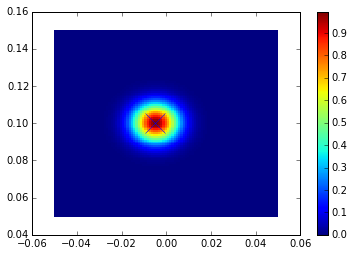

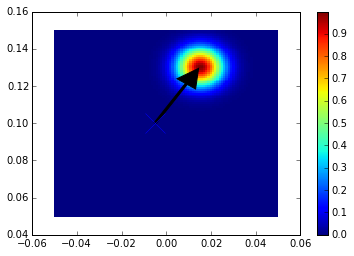

In [5]:
# ===============================================================
# make test data
# ===============================================================

rio = {
        "xo": -0.00, 'yo': 0.1,
        "dx": 0.1, 'dy': 0.1,
        'xPts': 100, 'yPts': 100
    }

xVmin, xVmax, xPts, yVmin, yVmax, yPts = trk.roi_to_galvoparameter(rio)

X, Y = np.meshgrid(np.linspace(xVmin, xVmax, xPts), np.linspace(yVmin, yVmax, yPts))

point_a = {
        "xo": -0.005, 'yo': 0.1,
        "sx": 0.01, 'sy': 0.01
    }

point_b = point_a.copy()

point_b['xo'] += 0.02 
point_b['yo'] += 0.03 

img_a = np.exp(-(X-point_a['xo'])**2. / point_a['sx']**2) * np.exp(-(Y-point_a['yo'])**2. / point_a['sy']**2)
img_b = np.exp(-(X-point_b['xo'])**2. / point_b['sx']**2) * np.exp(-(Y-point_b['yo'])**2. / point_b['sy']**2)

# ===============================================================
# run script
# ===============================================================
rio_new = trk.find_beam_position(img_a, img_b, rio)

print 'real shift x: {:0.03f}'.format(point_b['xo'] - point_a['xo'])
print 'real shift y: {:0.03f}'.format(point_b['yo'] - point_a['yo'])

print 'found shift x: {:0.03f}'.format(rio['xo'] - rio_new['xo'])
print 'found shift y: {:0.03f}'.format(rio['yo'] - rio_new['yo'])

# ===============================================================
# plot
# ===============================================================
plt.pcolor(X, Y, img_a)
plt.colorbar()
plt.plot(point_a['xo'], point_a['yo'], 'x' , ms = 20)

plt.figure()
plt.pcolor(X, Y, img_b)
plt.colorbar()
plt.plot(point_a['xo'], point_a['yo'], 'x' , ms = 20)
plt.axes().arrow(point_a['xo'], point_a['yo'], rio['xo'] - rio_new['xo'],rio['yo'] - rio_new['yo'], head_width=0.01, head_length=0.01, fc='k', ec='k', length_includes_head=True)

# plt.figure()
# plt.pcolor(X, Y, img_b-img_a)
# plt.colorbar()

# plt.figure()
# cor = signal.correlate2d (img_a, img_b, mode='same')
# plt.pcolor(X, Y,  cor)
# plt.colorbar()
# plt.plot(point_a['xo'], point_a['yo'], 'x' , ms = 20)

# plt.figure()
# cor = signal.correlate2d (img_a, img_a, mode='same')
# plt.pcolor(X, Y,  cor)
# plt.colorbar()
# plt.plot(point_a['xo'], point_a['yo'], 'x' , ms = 20)



In [4]:
print rio
print rio_new

{'xPts': 30, 'xo': -0.0, 'yo': 0.1, 'dx': 0.1, 'dy': 0.1, 'yPts': 30}
{'xPts': 30, 'xo': 0.020000000000000004, 'yo': 0.13, 'dy': 0.1, 'yPts': 30, 'dx': 0.1}
